# Where did we find GitHub links in eprints papers?

In [22]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt

In [2]:
f = open("../data/eprints_repos.txt", "r")
repos = []
for line in f.readlines():
    repos.append(line.rstrip("\n"))
repos = sorted(repos)

In [10]:
def load_cleaned_links(repo, date, domain):
    path = f"../data/analysis/cleaned_urls_{repo}_{date}_{domain}.csv"
    try:
        df = pd.read_csv(path)
    except FileNotFoundError:
        return None
    return df

In [13]:
df = None
for repo in repos:
    repo_df = load_cleaned_links(repo, "2010-", "github.com")
    if repo_df is not None:
        repo_df["repo"] = repo
        if df is None:
            df = repo_df
        else:
            df = pd.concat([df, repo_df])

In [18]:
df.describe()

,page_no
count,2005.000000
mean,33.949127
std,62.131014
min,0.000000
25%,5.000000
50%,10.000000
75%,24.000000
max,521.000000


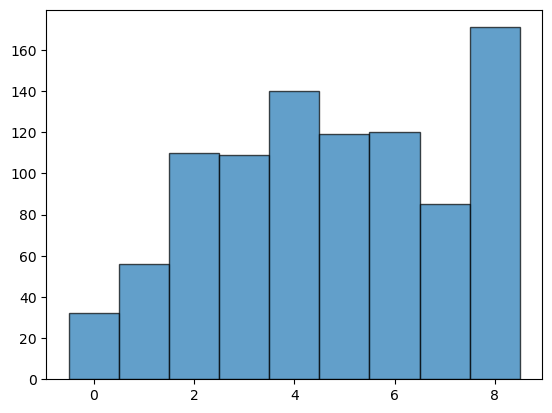

In [32]:
plt.hist(df.page_no[df.page_no < 10], bins=np.arange(10), align="left", ec="black", alpha=0.7)
plt.show()

CLOK can have title page in front, so first page ends up being the second one. IEEE papers can have that as well (Kingston), Openaccess. Can we check for that somehow? Others have introductions that last onto the second page and link GitHub there.

In [55]:
to_check = df.loc[df.page_no == 1, ["pdf_url", "github_user_cleaned_url"]]
pd.set_option('display.max_colwidth', None)
to_check

,pdf_url,github_user_cleaned_url
5,https://clok.uclan.ac.uk/45533/1/CVML-Pose_Convolutional_VAE_Based_Multi-Level_Network_for_Object_3D_Pose_Estimation.pdf,JZhao12/CVML-Pose
17,https://clok.uclan.ac.uk/43355/7/978-3-031-12053-4_65.pdf,CVML-UCLan/FCBFormer
3,https://eprints.keele.ac.uk/id/eprint/12066/1/2302.02710v1.pdf,alphapsa/PIPE
14,https://eprints.keele.ac.uk/id/eprint/11994/1/2208.07328.pdf,jlillo/tpfplotter
20,https://eprints.keele.ac.uk/id/eprint/12158/1/aa43879-22.pdf,jlillo/tpfplotter
27,https://eprints.keele.ac.uk/id/eprint/12063/1/aa44894-22.pdf,alphapsa/PIPE
28,https://eprints.keele.ac.uk/id/eprint/11910/1/3567445.3571103.pdf,brunomozza/IoTSecurityOntology
66,https://eprints.keele.ac.uk/id/eprint/11202/1/ShinyApp_resubmission_KP.pdf,Katerina-Pap/MA-cont-shiny-app
95,https://eprints.keele.ac.uk/id/eprint/10515/1/aa41587-21.pdf,jlillo/tpfplotter
108,https://eprints.keele.ac.uk/id/eprint/10028/1/2106.11331.pdf,lucaborsato/trades


In [56]:
len(to_check)

56

In [59]:
on_second_page_validation = [True, True, False, False, False, False, False, True, False, False, False, True, True, True, True, False, True, False, True, False, False, True, True, True, True, False, True, False, False, False, False, True, True, True, False, False, True, True, False, False, True, True, True, True, False, False, True, True, True, True, True, True, True, True, False, True]
len(on_second_page_validation)

56

In [60]:
np.array(on_second_page_validation).sum()

32